
#Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Importing dataset

In [7]:
df =pd.read_csv('/content/mobile_price_classification.csv')

In [8]:
df.head()

battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  int_memory  \
0            842          0          2.2         0          1   0           7   
1           1021          1          0.5         1          0   1          53   
2            563          1          0.5         1          2   1          41   
3            615          1          2.5         0          0   0          10   
4           1821          1          1.2         0         13   1          44   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0    0.6        188        2  ...         20       756  2549     9     7   
1    0.7        136        3  ...        905      1988  2631    17     3   
2    0.9        145        5  ...       1263      1716  2603    11     2   
3    0.8        131        6  ...       1216      1786  2769    16     8   
4    0.6        141        2  ...       1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [10]:
df.describe()

battery_power  bluetooth  clock_speed     dual_sim    front_cam  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

                4G   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [11]:
#checking for null values
df.isnull().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [12]:
#checking for duplicated values
df.duplicated().sum()

0

In [13]:
df.shape

(2000, 21)

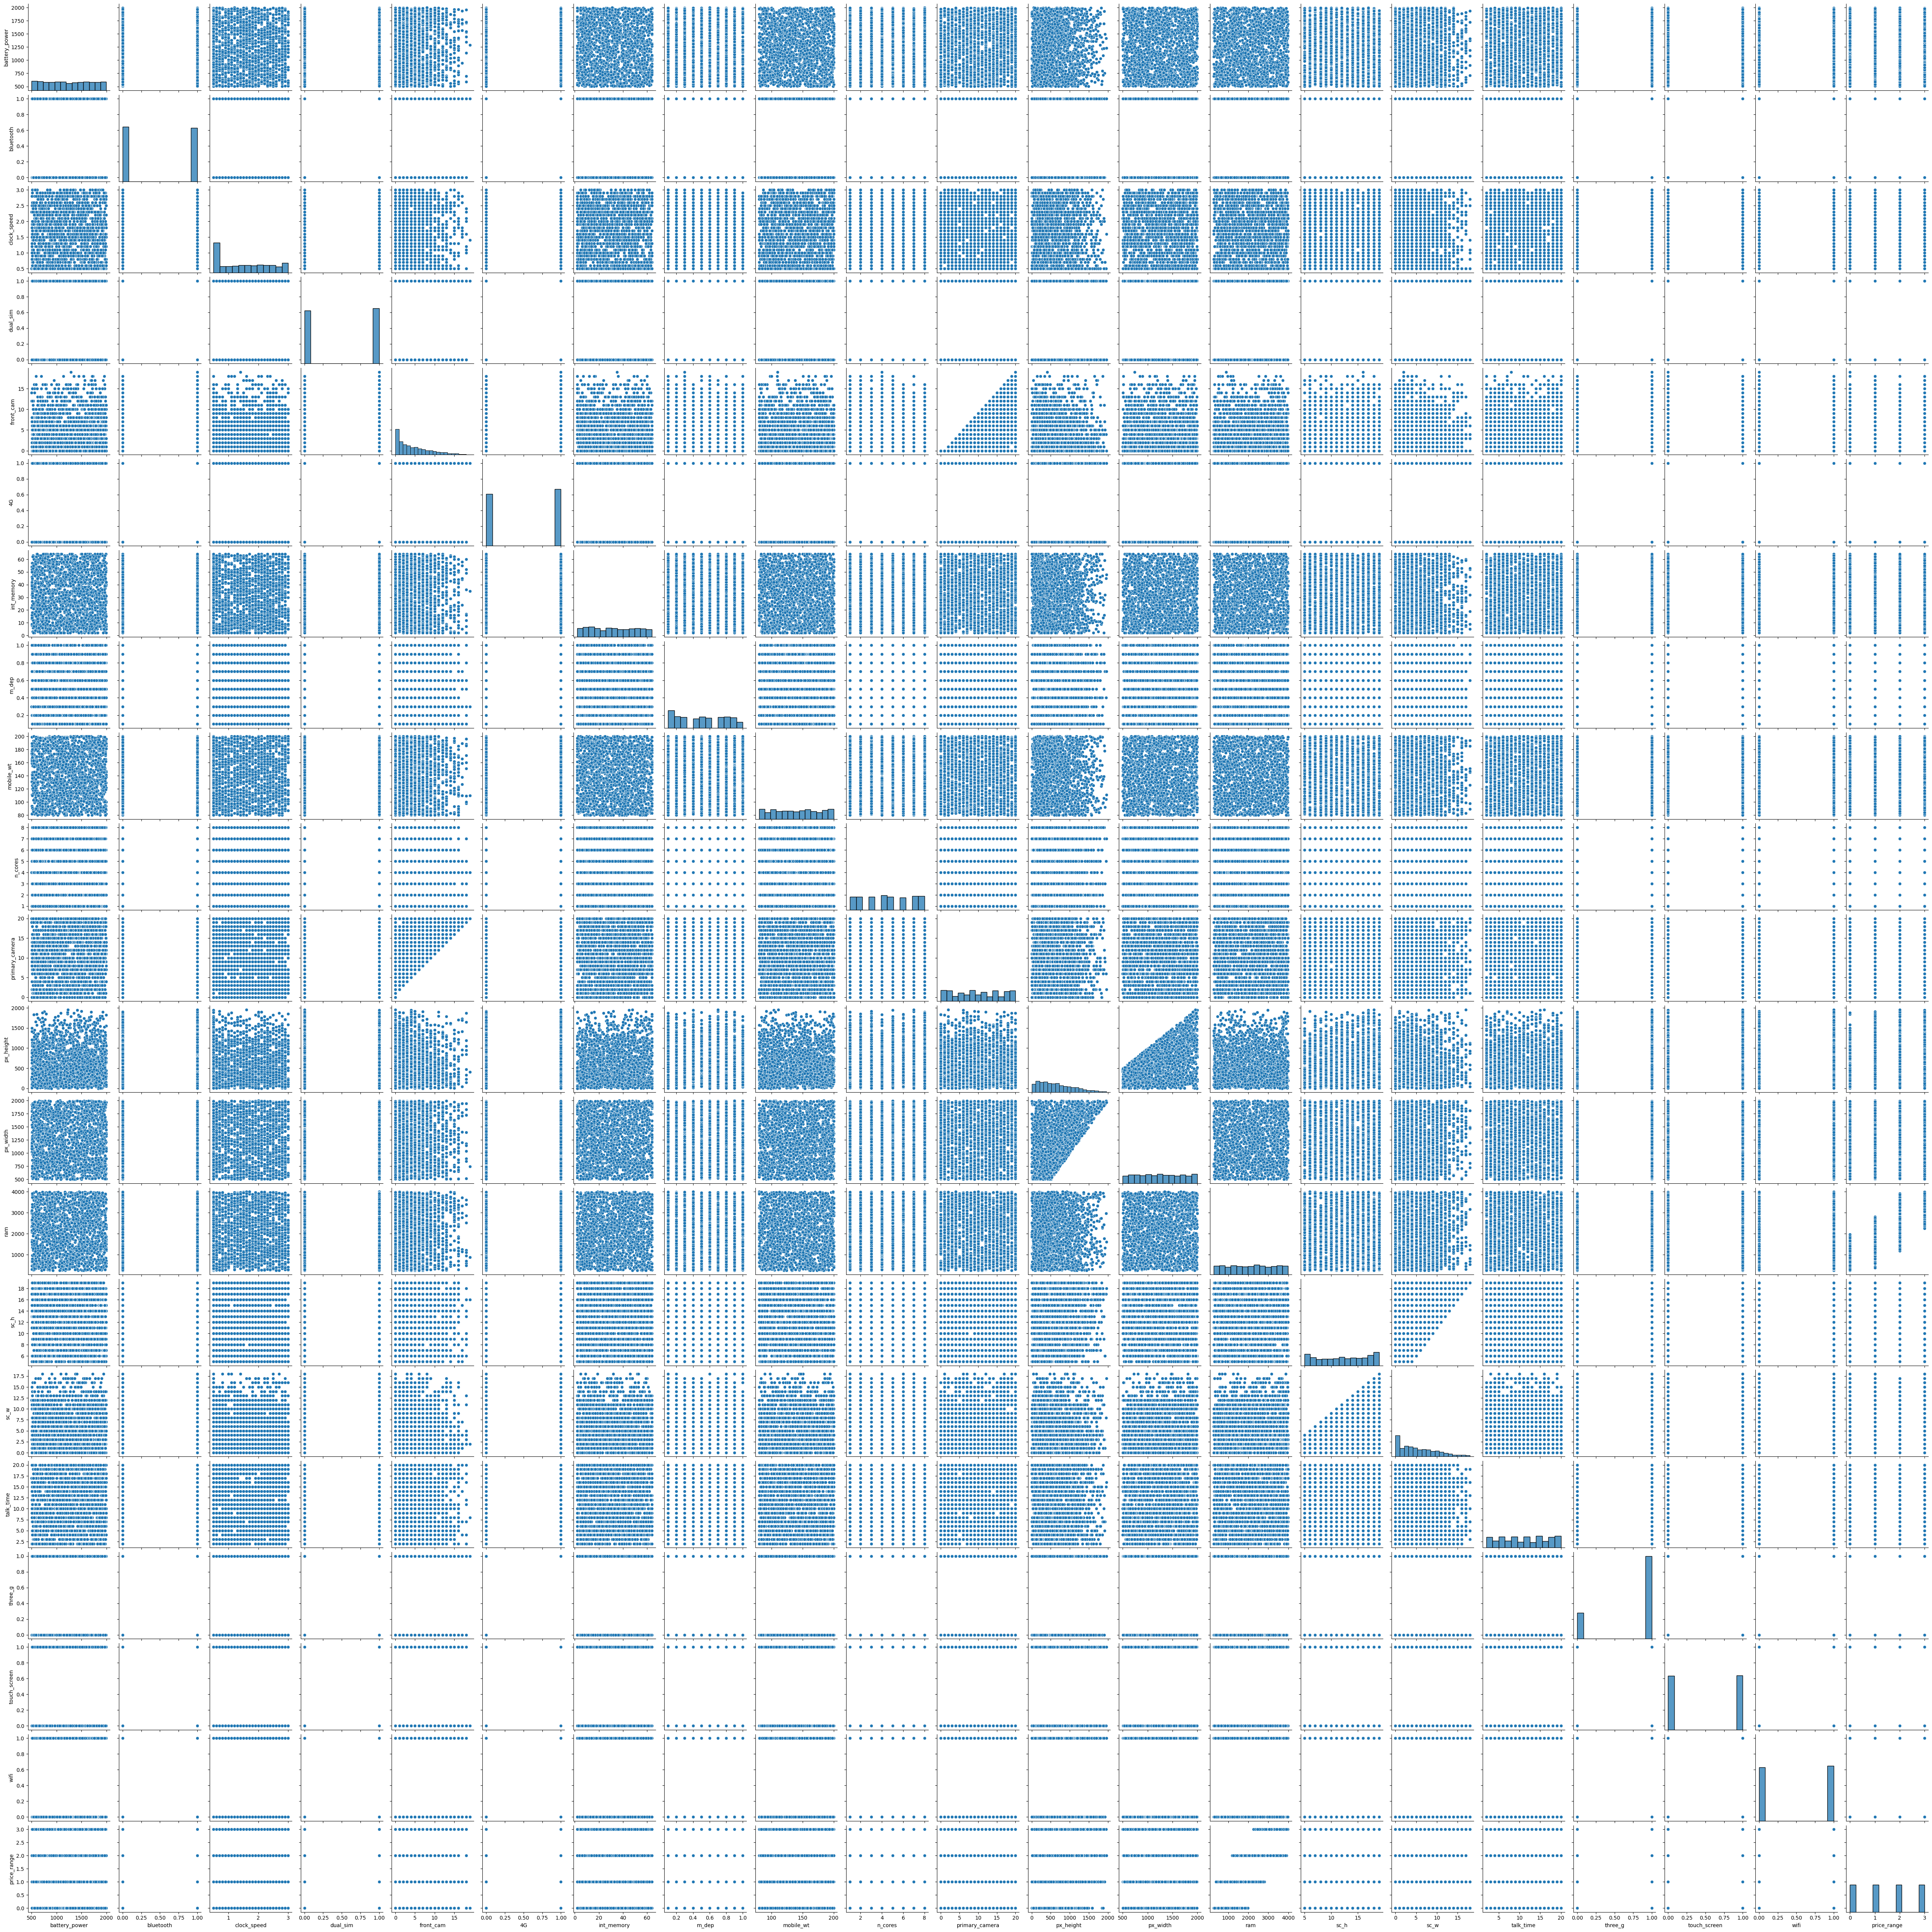

In [14]:
sns.pairplot(df)
plt.show()

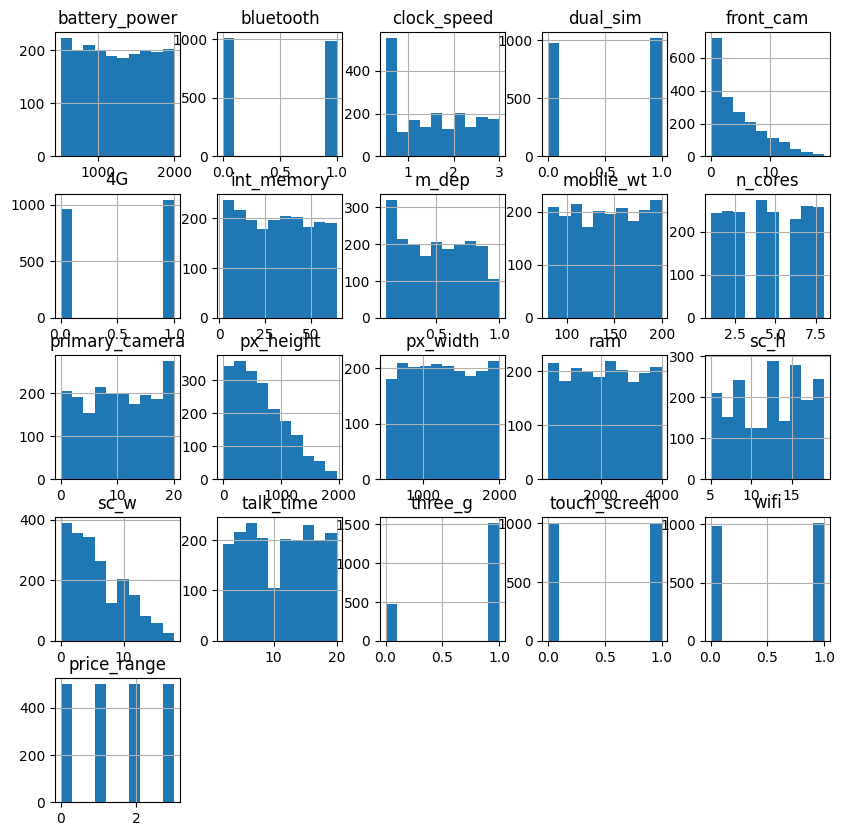

In [17]:
df.hist(figsize=(10,10))
plt.show()

#Train test Split

In [47]:
x = df.drop('price_range', axis = 1)
y = df[['price_range']]
y = pd.get_dummies(y).values

In [48]:
x_test,x_train,y_test,y_train=train_test_split(df.drop("price_range",axis=1),df["price_range"],test_size=0.2,random_state=42)

#Scaling

In [49]:
sc =StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


#ANN

In [50]:

model_ANN = Sequential()
model_ANN.add(Dense(10,activation= 'relu', input_dim = 20))
model_ANN.add(Dense(10, activation= 'relu'))
model_ANN.add(Dense(4, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model_ANN.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model_ANN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364 (1.42 KB)

 Trainable params: 364 (1.42 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)



In [53]:
print(x_train.shape, type(x_train), y_train.shape, type(y_train), x_test.shape, type(x_test), y_test.shape, type(y_test))


(400, 20) <class 'numpy.ndarray'> (400, 4) <class 'numpy.ndarray'> (1600, 20) <class 'numpy.ndarray'> (1600, 4) <class 'numpy.ndarray'>


In [54]:
model_ANN.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.2128 - loss: 1.6495 - val_accuracy: 0.2331 - val_loss: 1.5612
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1842 - loss: 1.5887 - val_accuracy: 0.2269 - val_loss: 1.5107
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2277 - loss: 1.4851 - val_accuracy: 0.2319 - val_loss: 1.4738
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2059 - loss: 1.4711 - val_accuracy: 0.2456 - val_loss: 1.4448
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2529 - loss: 1.4149 - val_accuracy: 0.2488 - val_loss: 1.4232
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2655 - loss: 1.4030 - val_accuracy: 0.2556 - val_loss: 1.4056
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2594 - loss: 1.3752 - val_accuracy: 0.2681 - val_loss: 1.3916
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3087 - loss: 1.3481 - val_accuracy: 0.2794 - val_los

In [55]:
y_pred_ANN = model_ANN.predict(x_test)
y_pred_ANN = np.argmax(y_pred_ANN, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
y_pred_ANN

array([3, 2, 1, ..., 0, 1, 1])

#Hyperparameter Tuning

In [67]:
def build_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential([
        Dense(64, input_dim=x_train.shape[1], activation="relu"),
        Dropout(dropout_rate),
        Dense(32, activation="relu"),
        Dense(y.shape[1], activation="softmax")
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model


In [71]:
learning_rates = [0.001, 0.01]
dropout_rates = [0.2, 0.3]

best_model = None
best_accuracy = 0

for lr in learning_rates:
    for dr in dropout_rates:
        print(f"Training with learning rate={lr}, dropout_rate={dr}")
        model = build_model(learning_rate=lr, dropout_rate=dr)
        history = model_ANN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32, verbose=0)
        # Get the loss and accuracy from the evaluate method
        loss, accuracy = model_ANN.evaluate(x_test, y_test, verbose=0) # accuracy is now a float representing model accuracy

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

Training with learning rate=0.001, dropout_rate=0.2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with learning rate=0.001, dropout_rate=0.3
Training with learning rate=0.01, dropout_rate=0.2
Training with learning rate=0.01, dropout_rate=0.3


In [73]:
#Evaluate the best model
print(f"Best Accuracy: {best_accuracy}")
y_pred = np.argmax(best_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)


Best Accuracy: 0.8418750166893005
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [74]:

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40       395
           1       0.00      0.00      0.00       409
           2       0.00      0.00      0.00       408
           3       0.00      0.00      0.00       388

    accuracy                           0.25      1600
   macro avg       0.06      0.25      0.10      1600
weighted avg       0.06      0.25      0.10      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
